<a href="https://colab.research.google.com/github/ArthurDF/OpenCV/blob/main/Trabalho1_Processamento_Digital_De_Imagens.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Esse Notebook corresponde ao primeiro trabalho da disciplina de processamento digital de imagens do semestre 2020.6 da UFRN.
Todos os códigos foram feitos por Arthur Diniz 

O trabalho foi desenvolvido se utilizando das bibliotecas OpenCV, Numpy e Matplotlib
Abaixo se encontram os imports necessários para o desenvolvimento desse trabalho

#Execute esses imports antes de executar qualquer código

In [4]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from google.colab.patches import cv2_imshow

# Código regions.py

O objetivo desse código é criar uma região onde a imagem dada como imput seja invertida.
Esse processo se dá percorrendo os pixels armazenados nos pontos p1 e p2




Abaixo o código lê a imagem e exibe a imagem original

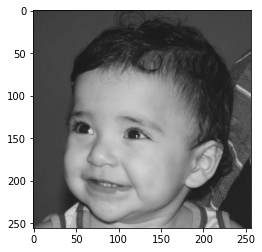

In [ ]:
image = cv.imread("biel.png",cv.IMREAD_GRAYSCALE)
imshow(image,cmap='gray',vmin=0, vmax=255)


Loop que percorre a imagem e modifica os valores entre os pontos

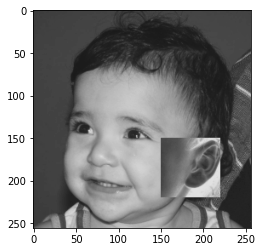

In [ ]:
p1=[150,150]
p2=[220,220]

for i in range(p1[0],p2[0]):
    for j in range(p1[1],p2[1]):
        image[i][j]=255-image[i][j]

imshow(image,cmap='gray',vmin=0, vmax=255)

#Código trocaregioes.py

O objetivo desse código é realizar a troca das regiões da imagem, nesse caso a imagem é dividida em 4 setores de forma diagonal

Abaixo se encontra a leitura da imagem e a criação de uma cópia dessa imagem
Além disso é armazenado o ponto final da imagem e o ponto médio da imagem nas variavéis p2,  fator_x e fator_y

In [ ]:
image = cv.imread("biel.png",cv.IMREAD_GRAYSCALE)
image2 = cv.imread("biel.png",cv.IMREAD_GRAYSCALE)

p1=[0,0]
p2=image.shape
fator_x = int((p2[0] - p1[0])/2)
fator_y = int((p2[1] - p1[1])/2)

Após extrair os fatores a cópia da imagem é modificada com os valores de outro setor da diagonal explorada

Esse processo é repetido 4 vezes

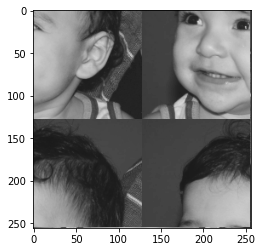

In [ ]:
for i in range(p1[0],fator_x):
    for j in range(p1[1],fator_y):
        image2[i][j] = image[i+fator_x][j+fator_y] 

for i in range(fator_x,p2[0]-1):
    for j in range(p1[1],fator_y):
        image2[i][j] = image[fator_x+i-p2[0]][j+fator_y] 

for i in range(p1[0],fator_x):
    for j in range(fator_y,p2[1]-1):
      image2[i][j] = image[fator_x+i-p2[0]][j+fator_y-p2[1]]

for i in range(fator_x,p2[1]-1):
    for j in range(fator_y,p2[1]-1):
        image2[i][j] = image[fator_x+i-p2[0]][j+fator_y-p2[1]] 

imshow(image2,cmap='gray',vmin=0, vmax=255)

#Código labelling_mais_que_255.py
O objetivo desse código é aprimorar o algoritmo de labelling passado em aula

 Para isso foi feito uma cópia da imagem em escala de cor e foi aplicado um valor único no algoritimo floodfill
 Isso foi feito com o objetivo de se evitar que o código reconheça a mesma bolha mais de 1 vez

Abaixo se encontra a leitura da imagem contendo as bolhas e a criação dos das mascaras utilizadas pelo algoritmo floodfill

256x256


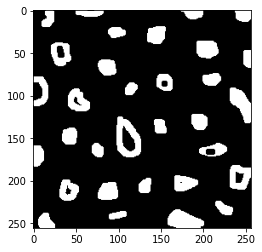

In [ ]:
image = cv.imread("bolhas.png",cv.IMREAD_GRAYSCALE)
image2 = cv.imread("bolhas.png",)
width, height = image.shape

print(str(width) +"x" + str(height))

ponto_x,ponto_y = 0, 0

nobjects = 0
mask = np.zeros((height + 2,width+2),np.uint8)
mask2 = np.zeros((height + 2,width+2),np.uint8)

#Parametros De Cor E Fonte Do Texto
font = cv.FONT_HERSHEY_SIMPLEX
fontScale = 0.2 
thickness = 2
color = (0,0,255)
imshow(image,cmap='gray',vmin=0, vmax=255);

Abaixo o algoritmo percorre a imagem procurando as bolhas e aplicando o algoritmo floodFill em cada bolha encontrada
Após a aplicação do algoritmo o código apresenta o numero de bolhas encontradas na imagem

In [ ]:
for i in range(height):
    for j in range(width):
        if image[j][i] == 255:
            nobjects+=1
            ponto_x = j
            ponto_y = i
            cv.floodFill(image, mask, seedPoint=(ponto_y,ponto_x), newVal=nobjects)
            cv.floodFill(image2, mask2, seedPoint=(ponto_y,ponto_x), newVal=(200,200,200))
            cv.putText(image2,"Bolha:"+str(nobjects),(ponto_y,ponto_x),font,fontScale,color)

#Realce da imagem para melhor vizualização
realce = cv.equalizeHist(image)

print("a figura tem " + str(nobjects)+ " bolhas")

a figura tem 32 bolhas


Exibição das imagens tratadas


Imagem original com o algoritmo de labeling aplicado

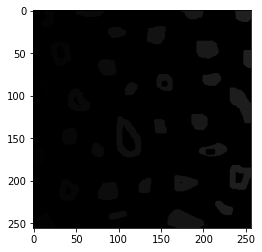

In [ ]:
plt.imshow(image,cmap='gray',vmin=0, vmax=255);
plt.show()

Imagem realçada pela equalização do histograma

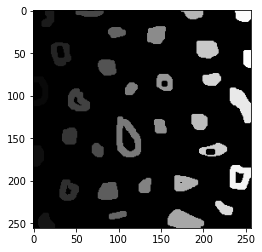

In [ ]:
plt.imshow(realce,cmap='gray',vmin=0, vmax=255);
plt.show()

Imagem categorizada com o algoritmo de labeling desenvolvido

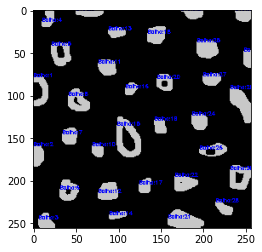

In [ ]:
plt.imshow(image2,cmap='gray',vmin=0, vmax=255);
plt.show()

#Código Labelling_Buracos.py
O objetivo desse código é fazer o algoritmo de labelling de uma forma que ele identifique regiões que tenham buracos internos
Esse algoritmo deve ao mesmo tempo eliminar as bolhas que tocam as bordas 

A principio são eliminadas as bolhas que tocam as bordas da imagem
Isso é feito ao se percorrer as bordas da imagem se eliminando as bolhas encontradas desses pontos

256x256


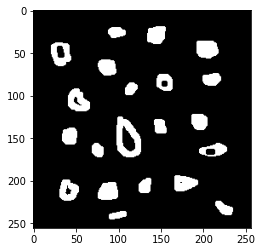

In [ ]:
image = cv.imread("bolhas.png",cv.IMREAD_GRAYSCALE)
# (Y, X) 
height, width = image.shape
#Y,X = image.shape

print(str(width) +"x" + str(height))

ponto_x,ponto_y = 0, 0

nobjects = 0
mask = np.zeros((height + 2,width+2),np.uint8)

#Elimina as bolhas da borda
for i in range(height):
    if image[0][i] == 255:
        cv.floodFill(image, mask, seedPoint=(i,0), newVal=0)
        
    if image[width-1][i] == 255:
        cv.floodFill(image, mask, seedPoint=(i,width-1), newVal=0)
        
for j in range(width):
    if image[j][0]==255:
        cv.floodFill(image, mask, seedPoint=(0,j), newVal=0)
        
    if image[j][height-1] ==255:
        cv.floodFill(image, mask, seedPoint=(height-1,j), newVal=0)

plt.imshow(image,cmap='gray',vmin=0, vmax=255);
plt.show()

Após isso a parte preta da imagem é preenchida com um valor de cor especifico para que assim o programa possa identificar os buracos contiodos nas bolhas

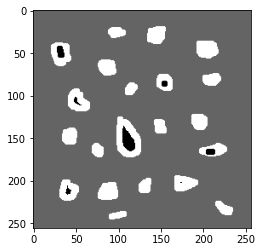

In [ ]:
mask = np.zeros((height + 2,width+2),np.uint8)        
cv.floodFill(image, mask, seedPoint=(0,0), newVal=100)
plt.imshow(image,cmap='gray',vmin=0, vmax=255);
plt.show()

Então se conta as bolhas presentes no programa e se preenche

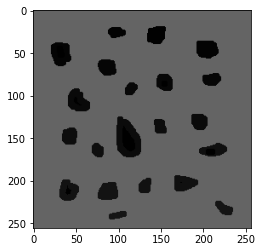

In [ ]:
for i in range(height):
    for j in range(width):
        if image[i][j] == 255:
            nobjects+=1
            ponto_y = j
            ponto_x = i
            cv.floodFill(image, mask, seedPoint=(ponto_y,ponto_x), newVal=nobjects)

plt.imshow(image,cmap='gray',vmin=0, vmax=255);
plt.show()

Embora não seja possível se observar na imagem as bolhas e os buracos estão em tons de cor diferentes, isso se dá devido a proximidade da cor dessas imagens
Mas na imagem abaixo pode ser visto como se da o fenômeno(observe como na área vermelha da imagem existem 2 valores 0 e 4)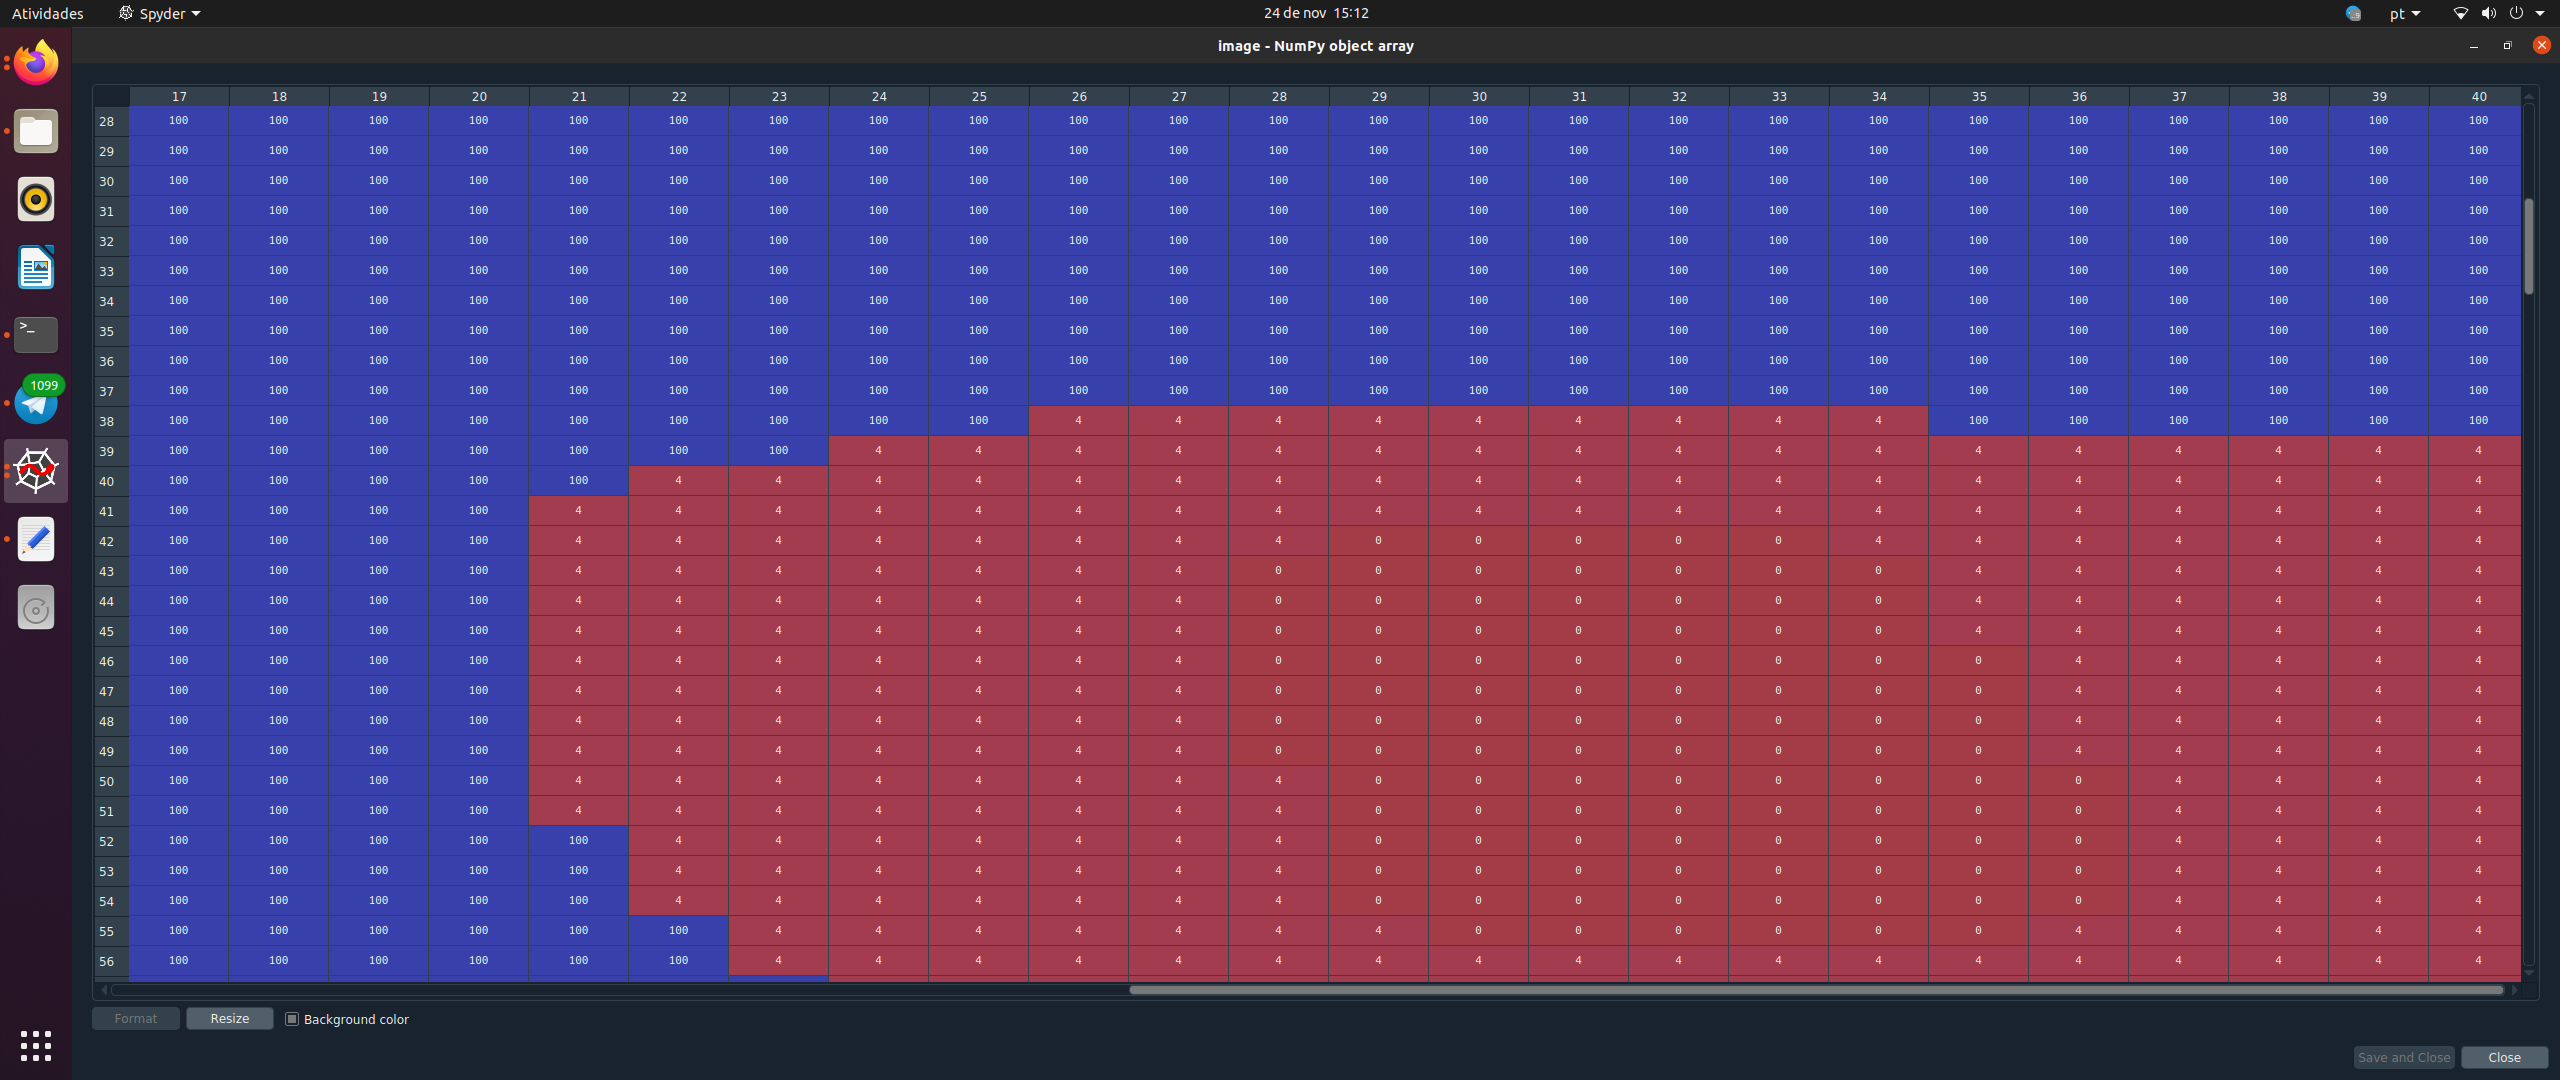

Então se contam os numeros de buracos contidos na imagem, essa contagem é feita de uma forma que assim que um buraco é encontrado o código armazena o valor da bolha que ele está percorrendo no momento
Logo fazendo isso o código evita que sejam contadas mais de uma bolha e ao mesmo tempo não conta buracos repetidos na mesma bolha

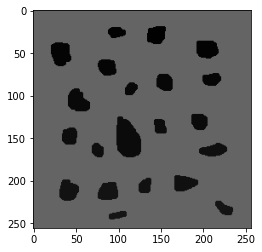

a figura tem 21 bolhas
a figura tem 7 bolhas com buracos internos
a figura tem 14 bolhas sem buracos internos


In [ ]:
last_value = 0
cbolha =0
for i in range(0,height):
    for j in range(1,width):
        if image[i][j]==0:
            if image[i-1][j]!=last_value:
                last_value = image[i-1][j]
                cbolha+=1
            ponto_x = i
            ponto_y = j
            cv.floodFill(image, mask, seedPoint=(ponto_y,ponto_x), newVal=int(image[i-1][j]))
plt.imshow(image,cmap='gray',vmin=0, vmax=255)
plt.show()       
print("a figura tem " + str(nobjects)+ " bolhas")
print("a figura tem " + str(cbolha) + " bolhas com buracos internos")
print("a figura tem " + str(nobjects - cbolha) + " bolhas sem buracos internos")

#Programa equalize.py
O programa equalize.py tem como o objetivo capturar um feed de vídeo e realizar a equalização do seu histograma antes de exibir a imagem.
Devido a limitações de hardware a captura do vídeo de feed não foi realizada entretanto o código foi feito a partir de um arquivo de vídeo

O código funciona a partir de capturas de frames do arquivo de vídeo.

A cada frame existente o programa aplica a equalização do histograma e exibe ele junto do frame original

Abaixo se encontra um exemplo é possível se observar que o cenário do fundo é visível na imagem equalizada enquanto na imagem original é impossível se visualizar

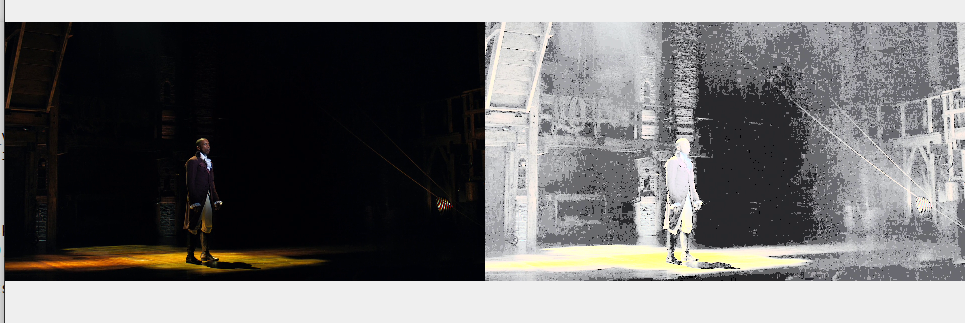


Abaixo se encontra o código utilizado para desenvolver a solução




In [ ]:
cap = cv.VideoCapture('Video.mp4')

while True:
    _, frame = cap.read()
    if frame is None:
        break
    #Conversão de arquivo de frame para o sistema de cor yuv(necessário para equalizar o histograma)
    frame_yuv = cv.cvtColor(frame,cv.COLOR_RGB2YUV)
    frame_yuv[:,:,0] = cv.equalizeHist(frame_yuv[:,:,0])
    frame_output = cv.cvtColor(frame_yuv,cv.COLOR_YUV2RGB)
    final = cv.hconcat([frame, frame_output])
    #cv.namedWindow('Video_Equalized',cv.WINDOW_NORMAL)
    #cv.resizeWindow('Video_Equalized',960,540)
    cv.imshow('Video_Equalized',final)
    
    if cv.waitKey(1) & 0xFF == ord('q'):
        break
    

cap.release()
#cv.destroyAllWindows()


#Programa MotionDetector.py

O objetivo desse programa é detectar variações bruscas no vídeo capturado, ele funciona fazendo comparações a cada 5 frames para ver o quão o histograma de cada frame foi modificado e caso essa modificação seja expressiva o programa assume que ocorreu um movimento na imagem

In [ ]:
cap = cv.VideoCapture('Hamilton.mp4',cv.IMREAD_GRAYSCALE)

'''Iteração feita para termos um frame anterior para quando começarmos o loop de análise'''
_, frame = cap.read()
frame_previous = frame
_, frame = cap.read()
cont_frame=0

while True:
    if cont_frame % 5 ==0 :
        cont_frame=0
        frame_previous = frame
        _, frame = cap.read()
        
        if frame is None:
            break
    
    hist_frame = cv.calcHist([frame],[0],None,[255],[0,255])
    hist_frame_previous = cv.calcHist([frame_previous],[0],None,[255],[0,255])
    
    '''Comparação dos histogramas'''
    compare = cv.compareHist(hist_frame,hist_frame_previous,0)
    cont_frame+=1
    
    '''Caso os frames sejam 80% identicos ou menos o alarme é ativado'''
    if compare <= 0.8:
        print("change:" + str(compare))
        break
        
    
cap.release()


#Programa laplgauss.py

O objetivo desse programa é o calculo do laplaciano do gaussiano de um feed de vídeo

Definição das matrizes usadas ao se aplicar os filtros convolutivos

In [ ]:
gauss = np.array([[0.0625,0.125,0.0625],
                  [0.125,0.25,0.125],
                  [0.0625,0.125,0.0625]])

laplacian = np.array([[0,-1,0],
                      [-1,4,-1],
                      [0,-1,0]])

Depois são criadas 4 cópias diferentes da imagem e cada uma dela é processada de uma forma diferente

A imagem superior esquerda é a imagem sem nenhum processamento
A superior direita é a imagem com um filtro de gauss aplicado
A inferior esquerda é a imagem com o laplaciano aplciado 
A inferior direita é a imagem com a aplicação respectiva do filtro de gauss e do filtro laplaciano

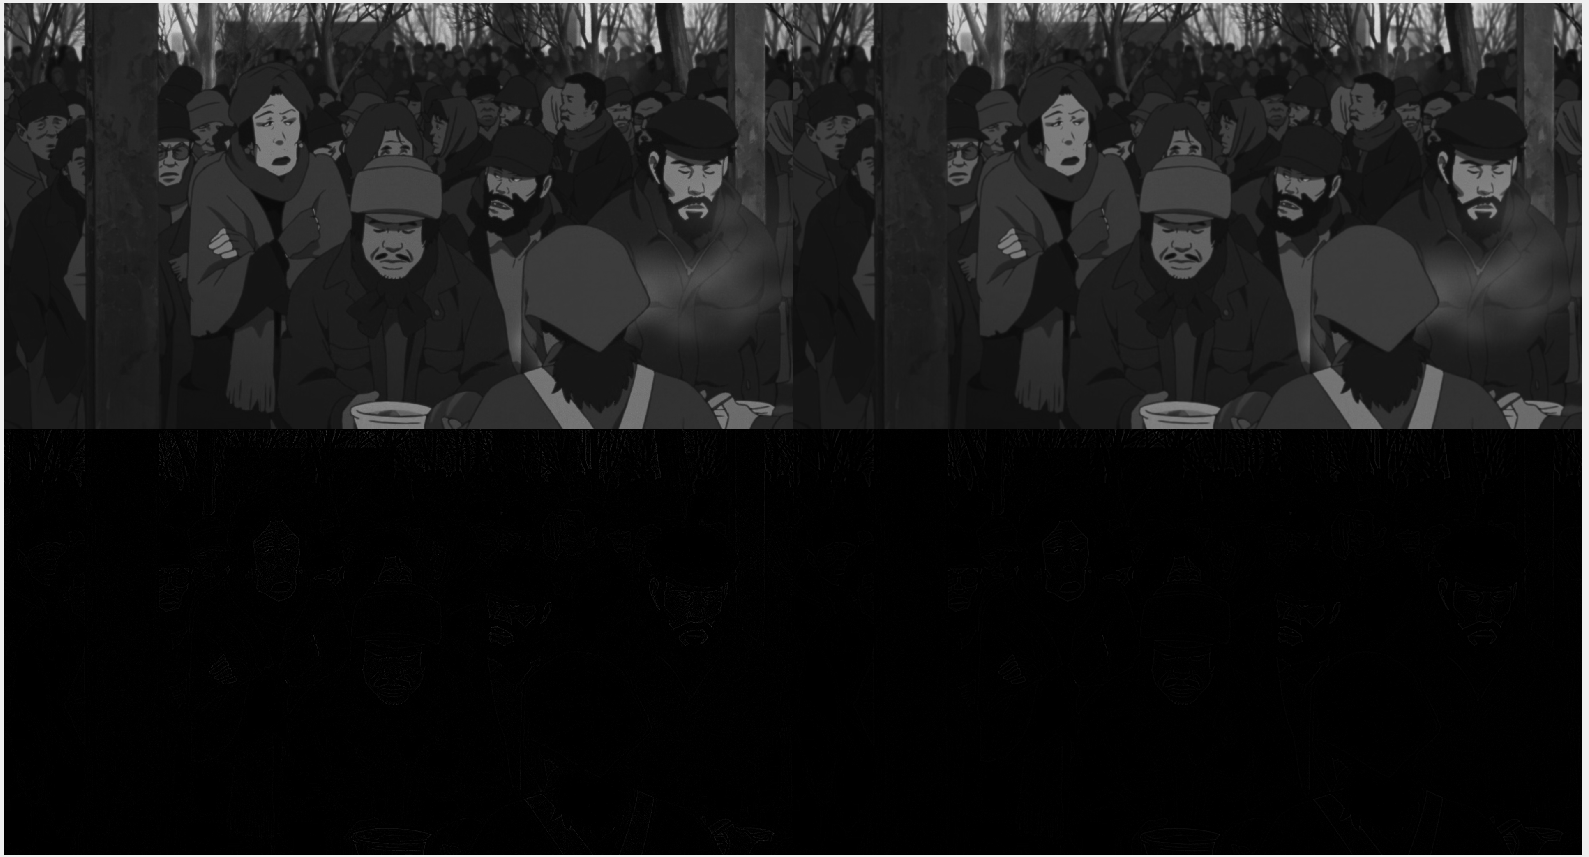

Abaixo está o código usado para gerar essas imagens

In [ ]:
cap = cv.VideoCapture('Tokyo.mp4')

while True:
    _, frame = cap.read()
    if frame is None:
        break
    
    frame = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
    #frame = cv.equalizeHist(frame)
    frame_gauss = cv.filter2D(frame,-1,gauss)
    frame_laplacian = cv.filter2D(frame,-1,laplacian)
    frame_laplacian_gauss = cv.filter2D(frame_gauss,-1,laplacian)
    
    '''Frames sem serem equalizados'''
    frame_laplacian_output = frame_laplacian
    frame_laplacian_gauss_output = frame_laplacian_gauss
    
    final = cv.vconcat([cv.hconcat([frame, frame_gauss]),cv.hconcat([frame_laplacian_output,frame_laplacian_gauss_output])])
    cv.namedWindow('Hamilton_Equalized',cv.WINDOW_NORMAL)
    cv.resizeWindow('Hamilton_Equalized',1600,900)
    cv.imshow('Hamilton_Equalized',final)
    
    if cv.waitKey(1) & 0xFF == ord('q'):
        break
    

cap.release()
cv.destroyAllWindows()

#Código tiltshift.py

O código abaixo tem como objetivo aplicar efeitos de tiltshift na imagem

ele faz isso borrando a imagem e criando um vetor de degrade um positivo e um negativo

O filtro positivo é multiplicado pela imagem original e o negativo é multiplicado pela imagem com o efeito de borramento

Após isso essas imagens são somadas e exibidas em tela

Todo esse processo é feito em tempo real por meio de inputs do usuario

Abaixo função que faz as operações do tiltshif

In [2]:
def onChange(alfa_slider):
    degrade = np.zeros((X,Y,Z),dtype=float) 
    negative_degrade = np.zeros((X,Y,Z),dtype=float)
    
    
    height = cv.getTrackbarPos('altura região central', box_name)
    decay = float(cv.getTrackbarPos('força de decaimento borda', box_name)) +1
    position = cv.getTrackbarPos('posição vertical do centro da região', box_name)
    blur = cv.getTrackbarPos('Blur', box_name)
    
    height = (float)(height/height_slider_max)*X/2;	
    center = (float)(position/position_slider_max)*X;
    l1 = -height
    l2 = height
    
    if blur!= 0:
        img_blur = cv.blur(img,(blur,blur))
    else :
        img_blur = img.copy()
 
    for x in range(X):
        degrade[x,0:Y,0:3] = 0.5*(np.tanh(((x-center)-l1)/(decay))-np.tanh(((x-center)-l2)/(decay)))
        negative_degrade[x,0:Y,0:3] = 1 - 0.5*(np.tanh(((x-center)-l1)/(decay))-np.tanh(((x-center)-l2)/(decay)))
    

    result1 = cv.multiply(img,degrade,dtype=0)
    result2 = cv.multiply(img_blur,negative_degrade,dtype=0)
    
    result = result1 + result2

    cv.imshow(box_name,result)
   


Abaixo está a leitura da imagem e definição dos parametros da interface

In [ ]:
    
    
    
d_slider = 50
d_slider_max = 100

position_slider = 50
position_slider_max = 100 

height_slider = 50
height_slider_max = 100

blur_slider = 25
blur_slider_max = 50

box_name = "ponte.jpg"
img=cv.imread("ponte.jpg")


X,Y,Z =img.shape

cv.namedWindow(box_name,cv.WINDOW_NORMAL)
cv.resizeWindow(box_name,(int(X),int(Y)))

cv.createTrackbar("Blur",box_name,blur_slider
                  ,blur_slider_max,onChange)
cv.createTrackbar("altura região central",box_name,height_slider
                  ,height_slider_max,onChange)
cv.createTrackbar("força de decaimento borda",box_name,d_slider
                  ,d_slider_max,onChange)
cv.createTrackbar("posição vertical do centro da região",box_name,position_slider
                  ,position_slider_max,onChange)

cv.imshow(box_name,img)
cv.waitKey(0)
cv.destroyAllWindows()

Abaixo se encontra uma imagem mostrando a interface sendo executada e o resultado do algoritmo

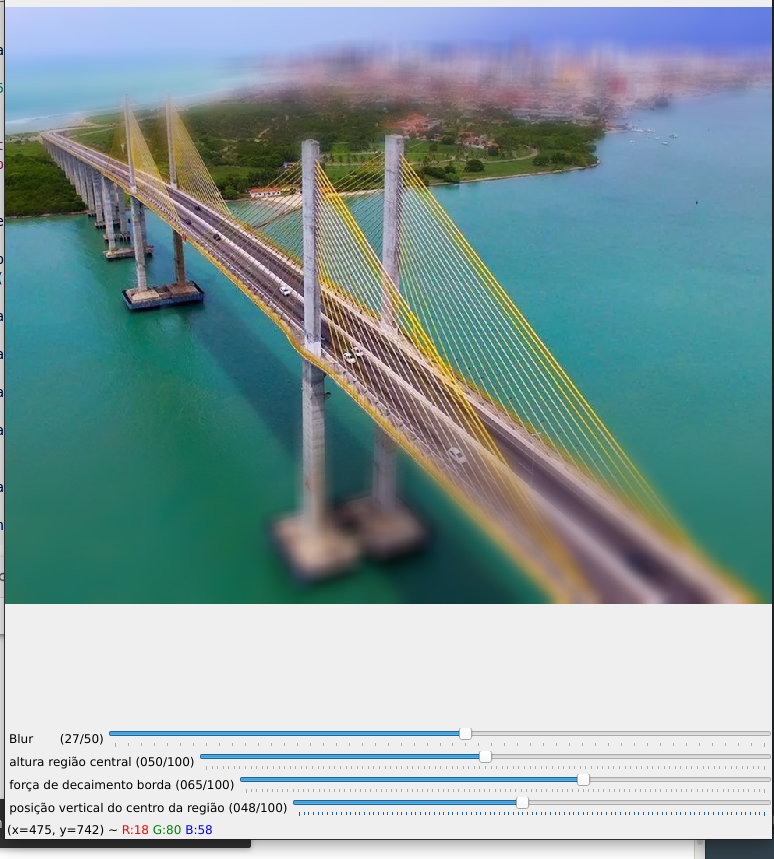

#Programa tiltshiftvideo.py

Esse programa tem como objetivo gerar um vídeo a partir do algoritmo tiltshift desenvolvido anteriormente

Ele captura cada frame do vídeo aplica as modificações desejadas pelo usuário e ao final salva um novo arquivo de vídeo

In [ ]:
def func(oi):
    pass
def onChange(alfa_slider):
    degrade = np.zeros((X,Y,Z),dtype=float) 
    negative_degrade = np.zeros((X,Y,Z),dtype=float)
    
    _, frame = cap.read()
    
    height = cv.getTrackbarPos('altura região central', box_name)
    decay = float(cv.getTrackbarPos('força de decaimento borda', box_name)) +1
    position = cv.getTrackbarPos('posição vertical do centro da região', box_name)
    blur = cv.getTrackbarPos('Blur', box_name)
    
    height = (float)(height/height_slider_max)*X/2;	
    center = (float)(position/position_slider_max)*X;
    l1 = -height
    l2 = height
    
    if blur!= 0:
        frame_blur = cv.blur(frame,(blur,blur))
    else :
        frame_blur = frame.copy()
 
    for x in range(X):
        degrade[x,0:Y,0:3] = 0.5*(np.tanh(((x-center)-l1)/(decay))-np.tanh(((x-center)-l2)/(decay)))
        negative_degrade[x,0:Y,0:3] = 1 - 0.5*(np.tanh(((x-center)-l1)/(decay))-np.tanh(((x-center)-l2)/(decay)))
    

    result1 = cv.multiply(frame,degrade,dtype=0)
    result2 = cv.multiply(frame_blur,negative_degrade,dtype=0)
    
    result = result1 + result2

    cv.imshow(box_name,result)
    video.write(frame) 
   
    

    
d_slider = 50
d_slider_max = 100

position_slider = 50
position_slider_max = 100 

height_slider = 50
height_slider_max = 100

blur_slider = 25
blur_slider_max = 50

box_name = "ponte.jpg"
cap=cv.VideoCapture("Hamilton.mp4")

_, frame = cap.read()
X,Y,Z =frame.shape

video = cv.VideoWriter('filename.avi',  
                         cv.VideoWriter_fourcc(*'MJPG'), 
                         10, (X,Y)) 

cv.namedWindow(box_name,cv.WINDOW_NORMAL)
cv.resizeWindow(box_name,(int(X),int(Y)))

cv.createTrackbar("Blur",box_name,blur_slider
                  ,blur_slider_max,func)
cv.createTrackbar("altura região central",box_name,height_slider
                  ,height_slider_max,func)
cv.createTrackbar("força de decaimento borda",box_name,d_slider
                  ,d_slider_max,func)
cv.createTrackbar("posição vertical do centro da região",box_name,position_slider
                  ,position_slider_max,func)

cv.imshow(box_name,frame)

while True:
    onChange(12)
    if cv.waitKey(1) & 0xFF == ord('q'):
        break

video.release()
cap.release()
cv.destroyAllWindows()
